<a href="https://colab.research.google.com/github/ManishSuhas0026/Speech-Processing/blob/main/2348530_SPR_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Time Normalization (LTN) is a technique often used in speech signal processing to align sequences of different lengths while preserving their relative temporal structure. For example, when two signals represent the same word spoken at different speeds, LTN helps map the shorter signal to the longer one by normalizing their time scales.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Interpolation is the process of estimating unknown values between two known values.

In [ ]:
# Define the two signals
signal_1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
signal_2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])

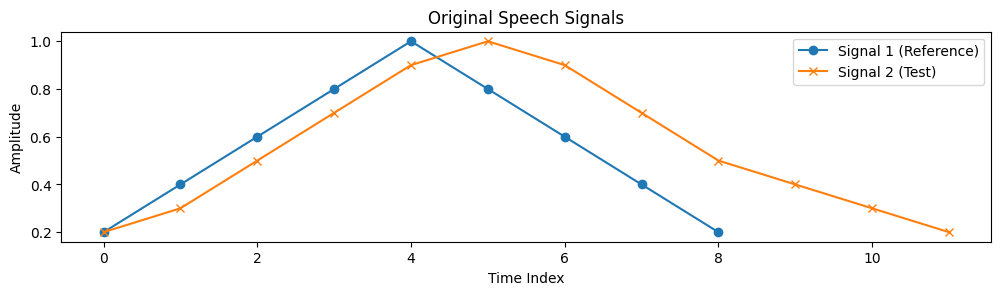

In [ ]:
# (a) Plot the original signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal_1, label="Signal 1 (Reference)", marker='o')
plt.plot(signal_2, label="Signal 2 (Test)", marker='x')
plt.title("Original Speech Signals")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.legend()

In [ ]:
# (b) Linear Time Normalization
# Normalize signal_2 to the same length as signal_1
x_signal_2 = np.linspace(0, len(signal_2) - 1, len(signal_2))
x_signal_1 = np.linspace(0, len(signal_1) - 1, len(signal_1))
interpolator = interp1d(x_signal_2, signal_2, kind='linear')
signal_2_normalized = interpolator(x_signal_1)

What This Achieves

Aligns Signal Lengths: signal_2 is resampled to have the same number of samples as signal_1.

Preserves Patterns: The amplitude patterns of signal_2 are preserved during this process, but the signal is scaled to align with the time indices of signal_1.

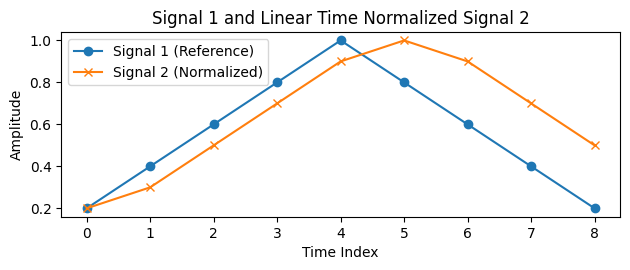

In [ ]:
# (c) Compute alignment (alignment is implicit as indices now match after normalization)
# Plot the normalized signal
plt.subplot(2, 1, 2)
plt.plot(signal_1, label="Signal 1 (Reference)", marker='o')
plt.plot(signal_2_normalized, label="Signal 2 (Normalized)", marker='x')
plt.title("Signal 1 and Linear Time Normalized Signal 2")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

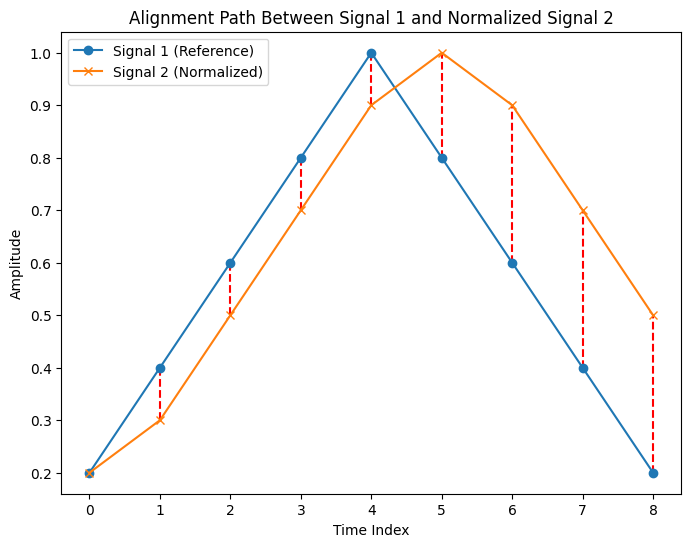

In [ ]:
# (d) Plot alignment path
plt.figure(figsize=(8, 6))
for i in range(len(signal_1)):
    plt.plot([i, i], [signal_1[i], signal_2_normalized[i]], 'r--')
plt.plot(signal_1, label="Signal 1 (Reference)", marker='o')
plt.plot(signal_2_normalized, label="Signal 2 (Normalized)", marker='x')
plt.title("Alignment Path Between Signal 1 and Normalized Signal 2")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Linear Time Normalization aligns signals by interpolating the second signal to match the length of the first.
This ensures that corresponding time indices across the signals represent comparable points, enabling direct comparison.

We have two signals, one short (signal_1) and one long (signal_2), and you want to compare them. The problem is that they don’t have the same number of points, so you can’t directly match them up. This code stretches or compresses the longer signal (signal_2) so that it matches the length of the shorter one (signal_1). Here's how it works:

1. Think of the signals as points on a timeline:

Signal_1 has 9 points spread across its timeline.
Signal_2 has 12 points spread across its (longer) timeline.

2. Create a common "timeline":

You generate evenly spaced time markers for both signals. For example:
Signal_1’s time markers: [0, 1, 2, ..., 8]
Signal_2’s time markers: [0, 1, 2, ..., 11]

3. Use interpolation to match timelines:

You tell Python: "Take signal_2's values and 'stretch' or 'shrink' them so they align with signal_1's time markers."
This involves estimating values for signal_2 at the positions of signal_1's time markers (using linear interpolation, which connects points with straight lines).

4. Get a new version of signal_2:

After interpolation, signal_2 now has exactly 9 points, just like signal_1, and it matches signal_1’s timeline.